<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.1.0


## Data preparation

In [2]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [3]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [4]:
df.Time = pd.to_datetime(df.Time)


In [5]:
plotly_df(df.set_index('Time')[["Users"]])

In [6]:
from fbprophet import Prophet

In [7]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [8]:
train_df = df[:-predictions].copy()

In [9]:
train_df

,ds,y
0,2017-01-01 00:00:00,34002
1,2017-01-01 01:00:00,37947
2,2017-01-01 02:00:00,41517
3,2017-01-01 03:00:00,44476
4,2017-01-01 04:00:00,46234
...,...,...
2590,2017-04-18 23:00:00,22520
2591,2017-04-19 00:00:00,23000
2592,2017-04-19 01:00:00,23408
2593,2017-04-19 02:00:00,26398


In [10]:
tr_start,tr_end = train_df[0:],train_df[-1:]
te_start,te_end = df[-predictions:-predictions+1]['ds'],df[-1:]['ds']

In [11]:
te_start,te_end 

(2595   2017-04-19 04:00:00
 Name: ds, dtype: datetime64[ns], 2624   2017-04-20 09:00:00
 Name: ds, dtype: datetime64[ns])

In [12]:
te_start = '2017-04-19 04:00:00'
te_end = '2017-04-20 09:00:00'

In [13]:
m = Prophet()
m.fit(train_df);

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [15]:
forecast = m.predict(future)
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2601,2017-04-19 19:00:00,35169.369847,14844.880801,25986.520548,35169.369847,35169.369847,-14675.146300,-14675.146300,-14675.146300,-12834.828555,-12834.828555,-12834.828555,-1840.317745,-1840.317745,-1840.317745,0.0,0.0,0.0,20494.223547
2602,2017-04-19 20:00:00,35177.760302,15483.583677,26402.399703,35177.760302,35177.760302,-14294.930799,-14294.930799,-14294.930799,-12483.492822,-12483.492822,-12483.492822,-1811.437977,-1811.437977,-1811.437977,0.0,0.0,0.0,20882.829503
2603,2017-04-19 21:00:00,35186.150758,16517.022884,27514.571116,35186.150758,35186.150758,-13082.944741,-13082.944741,-13082.944741,-11304.484491,-11304.484491,-11304.484491,-1778.460250,-1778.460250,-1778.460250,0.0,0.0,0.0,22103.206017
2604,2017-04-19 22:00:00,35194.541214,18221.211227,29212.871266,35194.541214,35194.541214,-11756.655630,-11756.655630,-11756.655630,-10015.196186,-10015.196186,-10015.196186,-1741.459444,-1741.459444,-1741.459444,0.0,0.0,0.0,23437.885584
2605,2017-04-19 23:00:00,35202.931669,18474.169059,29733.656480,35202.931669,35202.931669,-10855.864219,-10855.864219,-10855.864219,-9155.323692,-9155.323692,-9155.323692,-1700.540527,-1700.540527,-1700.540527,0.0,0.0,0.0,24347.067451
2606,2017-04-20 00:00:00,35211.322125,19205.607804,30627.964118,35211.322125,35211.322125,-10141.621853,-10141.621853,-10141.621853,-8485.786250,-8485.786250,-8485.786250,-1655.835602,-1655.835602,-1655.835602,0.0,0.0,0.0,25069.700272
2607,2017-04-20 01:00:00,35219.712581,20893.190798,32496.794333,35219.712581,35219.824752,-8694.532697,-8694.532697,-8694.532697,-7087.032047,-7087.032047,-7087.032047,-1607.500649,-1607.500649,-1607.500649,0.0,0.0,0.0,26525.179884
2608,2017-04-20 02:00:00,35228.103036,24062.651825,35035.763290,35227.603333,35232.985934,-5716.271270,-5716.271270,-5716.271270,-4160.559295,-4160.559295,-4160.559295,-1555.711974,-1555.711974,-1555.711974,0.0,0.0,0.0,29511.831767
2609,2017-04-20 03:00:00,35236.493492,28238.648465,39230.820061,35231.223250,35248.453400,-1319.443944,-1319.443944,-1319.443944,181.218517,181.218517,181.218517,-1500.662462,-1500.662462,-1500.662462,0.0,0.0,0.0,33917.049548
2610,2017-04-20 04:00:00,35244.883948,33005.197778,44557.637345,35233.403680,35261.164536,3450.397052,3450.397052,3450.397052,4892.954717,4892.954717,4892.954717,-1442.557665,-1442.557665,-1442.557665,0.0,0.0,0.0,38695.281000


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Answer: 38934


In [16]:
#You code here

round(forecast[forecast['ds']==('2017-01-01 00:00:00')]['yhat'])

0    38934.0
Name: yhat, dtype: float64

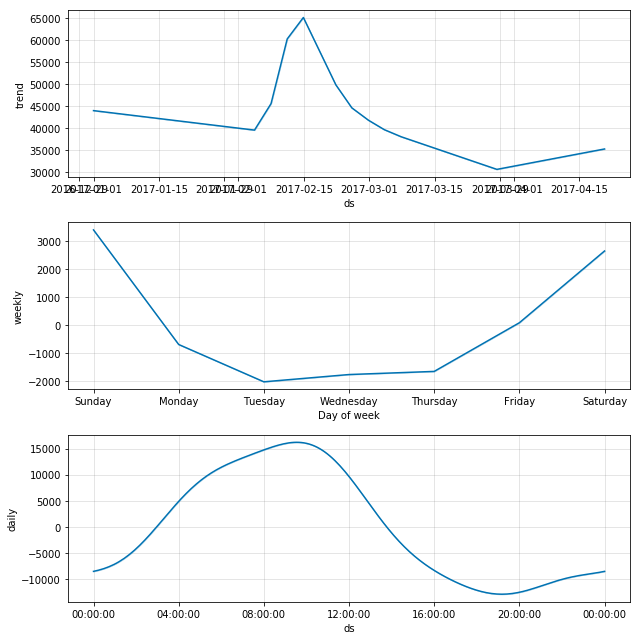

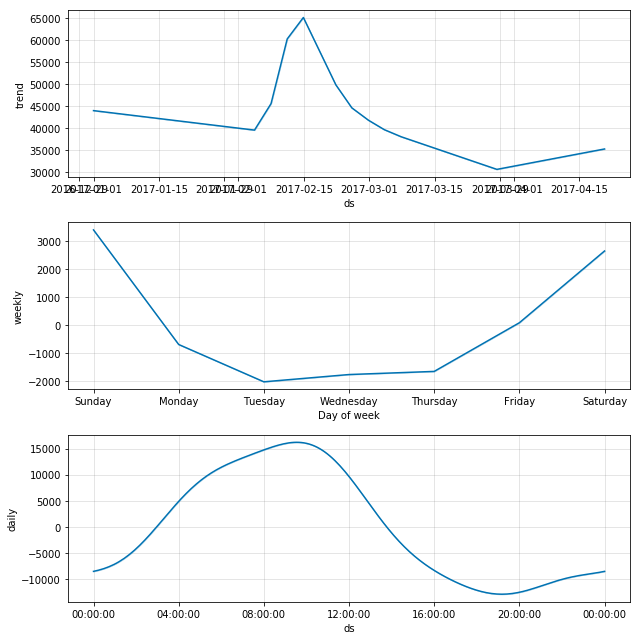

In [17]:


m.plot_components(forecast)



Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

-Answer : MAPE: 12.60

### <font color='red'>Question 3:</font> What is MAE equal to?

-Answer: MAE: 4320.45


In [18]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.
    
       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """
    
    # Make a copy
    df = df.copy()
    
    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model. 
    
    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]
    
    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}


for err_name, err_value in calculate_forecast_errors(cmp_df, predictions).items():
    print(err_name, err_value)

MAPE 12.603434829303731
MAE 4320.45573850123


## Predicting with ARIMA

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
#from scipy import stats
#import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)



import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


from itertools import product                    # some useful functions
from tqdm import tqdm_notebook


### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: Not stationary
- What is p_value? Answer: p = 0.24

In [20]:
train_df.set_index('ds', inplace=True)
train_df.index= pd.DatetimeIndex(train_df.index).to_period('H')

Dickey-Fuller test: p=0.240004


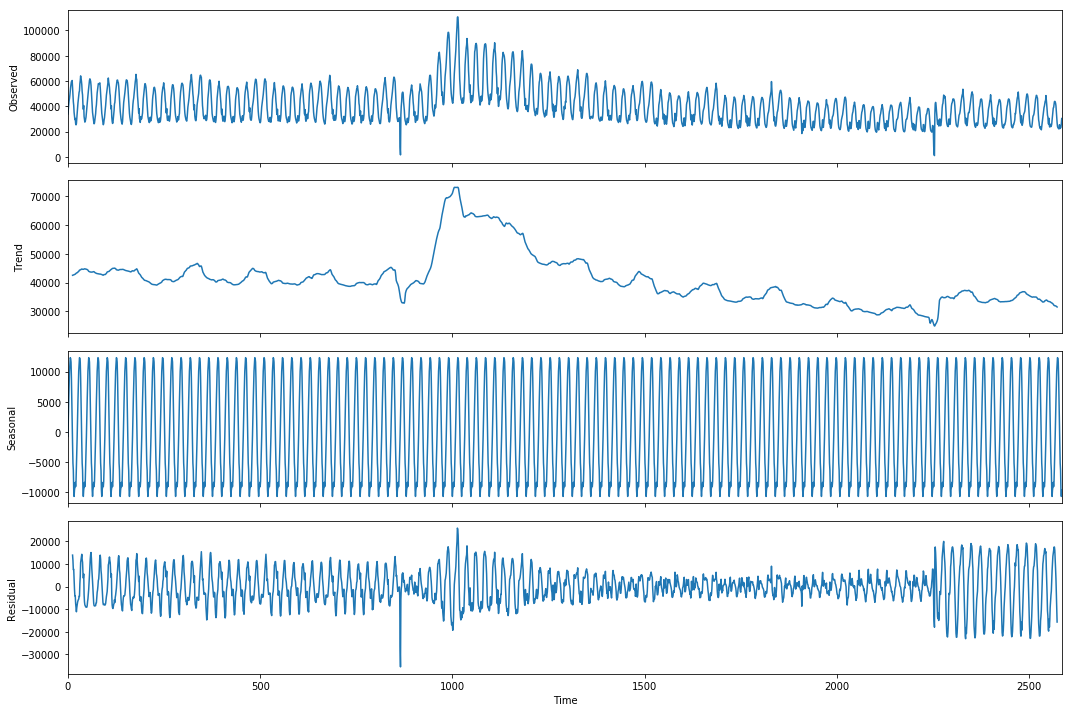

In [21]:
# You code here


sm.tsa.seasonal_decompose(train_df['y'].values, freq=24).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])


In [22]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

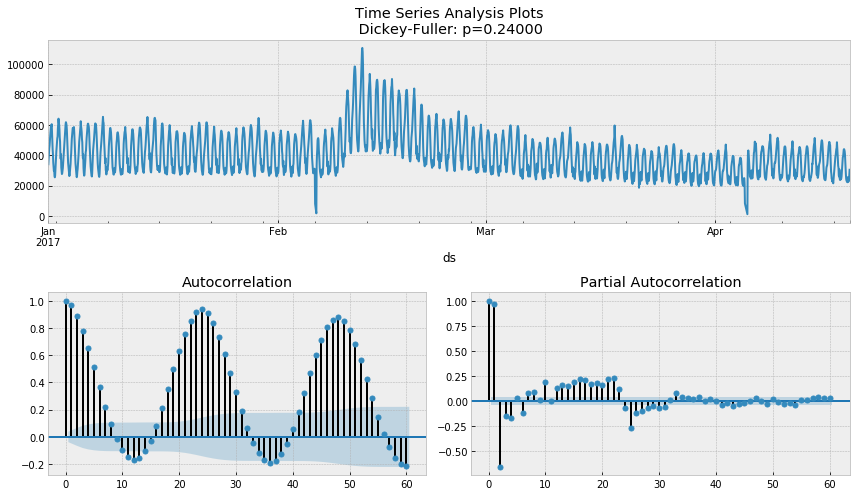

In [23]:
#Visualise the ACF and PACF of the train data set
tsplot(train_df.y, lags=60) 

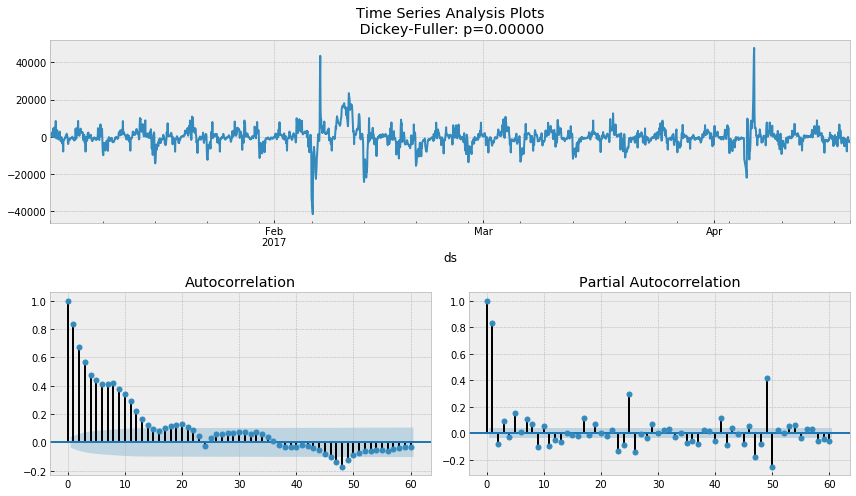

In [24]:
# Shifting by 24 to remove stationarity
ml_diff = train_df.y - train_df.y.shift(24)
tsplot(ml_diff[24:], lags=60)

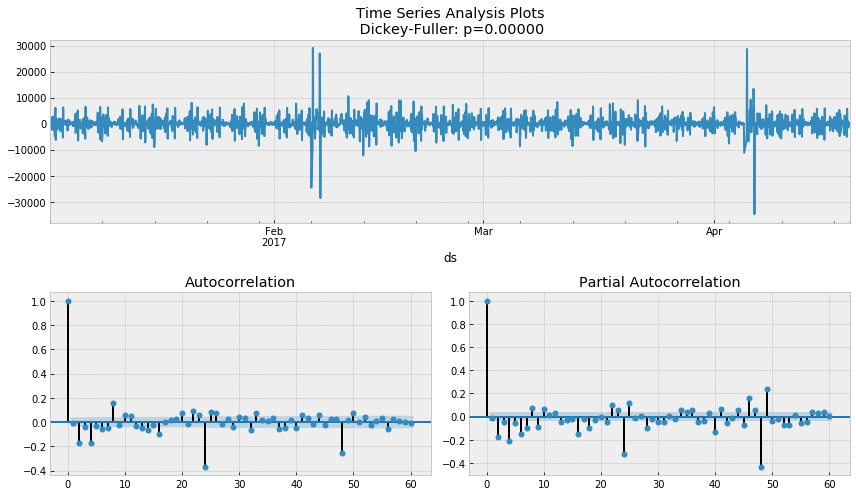

In [25]:
ml_diff = ml_diff - ml_diff.shift(1)
tsplot(ml_diff[24+1:], lags=60)

Picking initial values:

- p = 4 # 4th lag most significant on PACF
- d = 1 # Differnetiated by 1
- q = 4  # 4th lag most significant on ACF
- P =  2 # 24th and 48th significant on PACF
- D = 1 # Differnetiated by 1
- Q = 2  # 24th and 48th significant on PACF



-PS: Limited the number of parameters, so that the execution time is reduced. Otherwise execution is taking hours to complete

In [26]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=[1]
qs = range(2, 5)
Ps = range(2, 3)
D=[1]
Qs = range(2, 3)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs,d, Ps, Qs,D)
parameters_list = list(parameters)
len(parameters_list)

9

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




 Q5:Answer: p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1 Has lowest AIC, hence the best among options given

In [27]:
parameters_list

[(2, 2, 1, 2, 2, 1),
 (2, 3, 1, 2, 2, 1),
 (2, 4, 1, 2, 2, 1),
 (3, 2, 1, 2, 2, 1),
 (3, 3, 1, 2, 2, 1),
 (3, 4, 1, 2, 2, 1),
 (4, 2, 1, 2, 2, 1),
 (4, 3, 1, 2, 2, 1),
 (4, 4, 1, 2, 2, 1)]

#Since the below options are given in the question, adding these parameter to parameter_list
    - p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
    - p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
    - p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
    - p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


In [28]:
parameters_list.append((3,2,0,2,1,1))
parameters_list.append((3,6,1,2,1,1))
parameters_list.append((5,6,1,1,1,0))
parameters_list.append((7,7,0,2,2,2))

In [29]:
def optimizeSARIMA(parameters_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train_df.y, order=(param[0], param[2], param[1]), 
                                            seasonal_order=(param[3], param[5], param[4], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [30]:
%%time
result_table = optimizeSARIMA(parameters_list)

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/sit


CPU times: user 1h 48min 46s, sys: 1min 2s, total: 1h 49min 49s
Wall time: 55min 13s


In [31]:
result_table.head()


,parameters,aic
0,"(2, 3, 1, 2, 2, 1)",46552.838111
1,"(2, 4, 1, 2, 2, 1)",46574.561631
2,"(2, 2, 1, 2, 2, 1)",46585.284118
3,"(4, 4, 1, 2, 2, 1)",46613.117201
4,"(4, 3, 1, 2, 2, 1)",46619.387422


In [32]:
result_table[result_table['parameters'].isin([(3,2,0,2,1,1),
                                                (3,6,1,2,1,1),
                                                (5,6,1,1,1,0),
                                                (7,7,0,2,2,2)])].sort_values(by='aic')

,parameters,aic
9,"(3, 6, 1, 2, 1, 1)",46722.679942
10,"(3, 2, 0, 2, 1, 1)",46779.189995
11,"(5, 6, 1, 1, 1, 0)",47213.673709
12,"(7, 7, 0, 2, 2, 2)",47677.989197


In [33]:
# set the parameters that give the lowest AIC
p, q, d,P, Q,D = result_table.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(df.y, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 2616
Model:             SARIMAX(2, 1, 3)x(2, 1, 2, 24)   Log Likelihood              -23526.480
Date:                            Sun, 31 May 2020   AIC                          47072.960
Time:                                    15:33:06   BIC                          47131.558
Sample:                                         0   HQIC                         47094.195
                                           - 2616                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0098      0.007     -1.304      0.192      -0.024       0.005
ar.L2          0.9902      0.007   

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?
- Answer: 0.24

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Q6 Answer: p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1

Now do the same, but for the series with Box-Cox transformation.

In [34]:
import scipy.stats

train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [37]:
def optimizeSARIMA_BOXCOX(parameters_list):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(train_df.y_box, order=(param[0], param[2], param[1]), 
                                            seasonal_order=(param[3], param[5], param[4], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [38]:
%%time
result_table2 = optimizeSARIMA_BOXCOX(parameters_list)

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/opt/conda/lib/python3.6/sit


CPU times: user 1h 10min 28s, sys: 1min, total: 1h 11min 28s
Wall time: 36min 8s


In [40]:

result_table2.head()

,parameters,aic
0,"(4, 3, 1, 2, 2, 1)",7933.906042
1,"(2, 2, 1, 2, 2, 1)",7936.423733
2,"(3, 2, 1, 2, 2, 1)",7938.397479
3,"(2, 3, 1, 2, 2, 1)",7938.403601
4,"(4, 4, 1, 2, 2, 1)",7939.936371


In [41]:
result_table2[result_table2['parameters'].isin([(3,2,0,2,1,1),
                                                (3,6,1,2,1,1),
                                                (5,6,1,1,1,0),
                                                (7,7,0,2,2,2)])].sort_values(by='aic')

,parameters,aic
9,"(3, 2, 0, 2, 1, 1)",7941.311131
10,"(3, 6, 1, 2, 1, 1)",7942.873153
11,"(5, 6, 1, 1, 1, 0)",8010.027186
12,"(7, 7, 0, 2, 2, 2)",8056.468032


In [42]:

p, q, d,P, Q,D = result_table2.parameters[0]

best_model2=sm.tsa.statespace.SARIMAX(train_df.y_box, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model2.summary())

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                 Statespace Model Results                                 
Dep. Variable:                              y_box   No. Observations:                 2586
Model:             SARIMAX(4, 1, 3)x(2, 1, 2, 24)   Log Likelihood               -3954.953
Date:                            Sun, 31 May 2020   AIC                           7933.906
Time:                                    16:58:33   BIC                           8004.084
Sample:                                01-01-2017   HQIC                          7959.353
                                     - 04-19-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6650      0.034    -19.335      0.000      -0.732      -0.598
ar.L2          0.3453      0.024   

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [43]:
# You code here

def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))


In [44]:
train_df['yhat'] = invboxcox(best_model2.fittedvalues, lmbda)

In [45]:
train_df

,y,y_box,yhat
ds,,,
2017-01-01 00:00,34002,49.128622,1.000000
2017-01-01 01:00,37947,50.588524,34002.009469
2017-01-01 02:00,41517,51.814125,37946.970982
2017-01-01 03:00,44476,52.771128,41516.979956
2017-01-01 04:00,46234,53.317187,44475.976188
...,...,...,...
2017-04-18 23:00,22520,43.988536,24789.236406
2017-04-19 00:00,23000,44.239155,23837.615522
2017-04-19 01:00,23408,44.449101,24567.059938


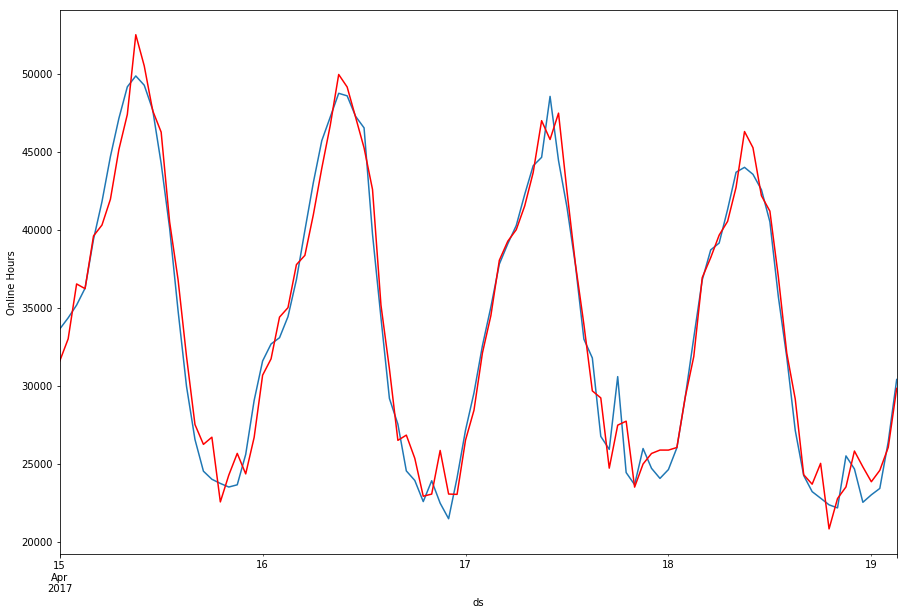

In [52]:


train_df.y.tail(100).plot()
train_df.yhat.tail(100).plot(color='r')
plt.ylabel('Online Hours');
